# Preprocessing the Data

# Step 1: Evaluating the Data

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
measurements_df = pd.read_csv('../resources/hawaii_measurements.csv')
stations_df = pd.read_csv('../resources/hawaii_stations.csv')

### Hawaii_Measurements

#### Sample dataframe

In [3]:
measurements_df.head(20)

,station,date,prcp,tobs
0,USC00519397,2010-01-01,0.08,65
1,USC00519397,2010-01-02,0.00,63
2,USC00519397,2010-01-03,0.00,74
3,USC00519397,2010-01-04,0.00,76
4,USC00519397,2010-01-06,NaN,73
5,USC00519397,2010-01-07,0.06,70
6,USC00519397,2010-01-08,0.00,64
7,USC00519397,2010-01-09,0.00,68
8,USC00519397,2010-01-10,0.00,73
9,USC00519397,2010-01-11,0.01,64


#### Row counts

In [4]:
measurements_df.count()

station    19550
date       19550
prcp       18103
tobs       19550
dtype: int64

#### Number of prcp NaN values

In [5]:
num_nans = measurements_df.station.count() - measurements_df.prcp.count()
num_nans

1447

In [6]:
f"Percentage of NaN values to Total Number of Rows: {(num_nans / len(measurements_df))*100 :.2f}%"

'Percentage of NaN values to Total Number of Rows: 7.40%'

Because the amount of prcp NaN values is more than 5% of total prcp values I think imputing will be a better alternative to dropping those values and losing a lot of good data represented by the other variables.

#### Descriptive statistics

In [7]:
measurements_df.describe()

,prcp,tobs
count,18103.000000,19550.000000
mean,0.160644,73.097954
std,0.468746,4.523527
min,0.000000,53.000000
25%,0.000000,70.000000
50%,0.010000,73.000000
75%,0.110000,76.000000
max,11.530000,87.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1075ffb00>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10f2d3dd8>]], dtype=object)

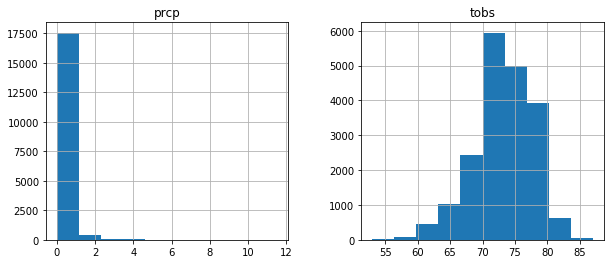

In [8]:
measurements_df.hist(figsize=(10,4))

### Hawaii_Stations

#### Dataframe

In [9]:
stations_df

,station,name,latitude,longitude,elevation
0,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


# Step 2: Testing and Applying Null Value Replacement Methods

### Modify dataframes to perform ML on NaN values

#### Merge dataframes into one dataframe

In [10]:
climate_df = measurements_df.merge(stations_df, how='inner', on='station')
climate_df.head()

,station,date,prcp,tobs,name,latitude,longitude,elevation
0,USC00519397,2010-01-01,0.08,65,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,USC00519397,2010-01-02,0.00,63,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
2,USC00519397,2010-01-03,0.00,74,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
3,USC00519397,2010-01-04,0.00,76,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
4,USC00519397,2010-01-06,NaN,73,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0


#### Convert date-time to ordinal

In [11]:
from datetime import datetime

In [12]:
climate_df['ord_date'] = climate_df.date.apply(lambda x: datetime.strptime(x, '%Y-%m-%d').date().toordinal())

### ML

In [13]:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV

In [14]:
ml_df = climate_df[['ord_date','prcp', 'tobs', 'latitude', 'longitude', 'elevation']].dropna().copy()

In [15]:
X = np.array(ml_df.drop(['prcp'], axis=1))
y = np.array(ml_df['prcp'])

In [16]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=.2)

##### Classifier: Linear Regression

In [17]:
clf_LinRe = LinearRegression()
clf_LinRe.fit(X_train, y_train)
clf_LinRe.score(X_test, y_test)

0.047373298296047299

##### Classifier: Lasso Cross Validation

In [18]:
clf_Lasso = LassoCV()
clf_Lasso.fit(X_train, y_train)
clf_Lasso.score(X_test, y_test)

0.04508408449044532

Machine Learning was a fail as shown by the low R-squared values. I could not find a suitable algorithm that would predict percipitation based off of the features: date, temperature, latitude, longitude, elevation.

### Replacing percipation NaNs

#### Determining the type of stratistical central tendancy value to impute

station
USC00511918    AxesSubplot(0.125,0.125;0.775x0.755)
USC00513117    AxesSubplot(0.125,0.125;0.775x0.755)
USC00514830    AxesSubplot(0.125,0.125;0.775x0.755)
USC00516128    AxesSubplot(0.125,0.125;0.775x0.755)
USC00517948    AxesSubplot(0.125,0.125;0.775x0.755)
USC00518838    AxesSubplot(0.125,0.125;0.775x0.755)
USC00519281    AxesSubplot(0.125,0.125;0.775x0.755)
USC00519397    AxesSubplot(0.125,0.125;0.775x0.755)
USC00519523    AxesSubplot(0.125,0.125;0.775x0.755)
Name: prcp, dtype: object

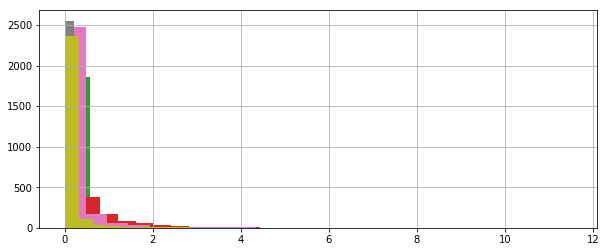

In [19]:
measurements_df.groupby('station')['prcp'].hist(figsize=(10,4), bins=20)

In [20]:
measurements_df.groupby('station').median()

,prcp,tobs
station,,
USC00511918,0.00,72
USC00513117,0.02,73
USC00514830,0.02,75
USC00516128,0.16,71
USC00517948,0.00,75
USC00518838,0.03,73
USC00519281,0.04,72
USC00519397,0.00,76
USC00519523,0.00,75


Because the distribution of percipation values are skewed to the right I am going to impute median values into their NaNs based on which station that value is representing.

#### Imputing specific station median values into NaNs

In [21]:
stations = stations_df.groupby('station').count().reset_index().station.tolist()
meds = measurements_df.groupby('station').prcp.median().tolist()

In [22]:
for row, column in measurements_df[['station', 'prcp']].loc[measurements_df.prcp.isnull() == True].iterrows():
    for n in np.arange(0, len(stations)):
        if column.station == stations[n]:
            measurements_df.at[row, 'prcp'] = meds[n]

In [23]:
measurements_df.count()

station    19550
date       19550
prcp       19550
tobs       19550
dtype: int64

station
USC00511918    AxesSubplot(0.125,0.125;0.775x0.755)
USC00513117    AxesSubplot(0.125,0.125;0.775x0.755)
USC00514830    AxesSubplot(0.125,0.125;0.775x0.755)
USC00516128    AxesSubplot(0.125,0.125;0.775x0.755)
USC00517948    AxesSubplot(0.125,0.125;0.775x0.755)
USC00518838    AxesSubplot(0.125,0.125;0.775x0.755)
USC00519281    AxesSubplot(0.125,0.125;0.775x0.755)
USC00519397    AxesSubplot(0.125,0.125;0.775x0.755)
USC00519523    AxesSubplot(0.125,0.125;0.775x0.755)
Name: prcp, dtype: object

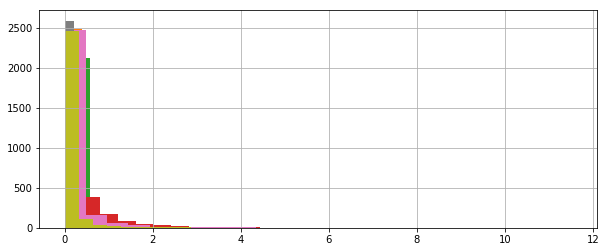

In [24]:
measurements_df.groupby('station')['prcp'].hist(figsize=(10,4), bins=20)

The distribution didn't alter much after imputing values. It looks good to me, lets export it.

# Step 3: Export Clean Data

In [26]:
measurements_df.to_csv('../resources/clean_hawaii_measurements.csv', index=False)